In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")


In [2]:
data = pd.read_csv('dengue_sinan.csv', low_memory=False)

In [3]:
data

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,0000158,2.0,A90,2016-03-05,201609.0,2016.0,29.0,292210.0,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,0000298,2.0,A90,2016-02-15,201607.0,2016.0,29.0,293290.0,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,0005082,2.0,A90,2016-03-25,201612.0,2016.0,29.0,293250.0,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,0111262,2.0,A90,2016-03-24,201612.0,2016.0,29.0,291360.0,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,0000166,2.0,A90,2016-03-13,201611.0,2016.0,29.0,292210.0,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620207,0001257,2.0,A90,2024-03-04,202410.0,2024.0,29.0,291980.0,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,0372024,2.0,A90,2024-01-26,202404.0,2024.0,29.0,292303.0,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,0000128,2.0,A90,2024-02-19,202408.0,2024.0,29.0,291400.0,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
620210,0002257,2.0,A90,2024-03-26,202413.0,2024.0,29.0,291980.0,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,39ff9aa9be21447bbb7d02b8a4b51bf4f1f9da1607ad75...


##### Separando o colunas importantes para o projeto

In [4]:
colunas = [
    'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO','DT_NOTIFIC','INTERNA', 'DT_OBITO','ALRM_HEPAT', 'ALRM_LIQ', 'DT_ALRM', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'NAUSEA', 'VOMITO',
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
    'LACO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'DOR_RETRO', 'RENAL', 'HIPERTENSA', 
    'ACIDO_PEPT', 'AUTO_IMUNE'
]

base_dengue = data.filter(items=colunas)

In [5]:
base_dengue

,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_NOTIFIC,DT_OBITO,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,FEBRE,MIALGIA,...,LEUCOPENIA,LACO,DIABETES,HEMATOLOG,HEPATOPAT,DOR_RETRO,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE
0,8.0,NaN,NaN,2016-03-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,NaN,NaN,2016-02-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,2.0,1.0,2016-03-25,NaN,NaN,NaN,NaN,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,10.0,2.0,NaN,2016-03-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,NaN,NaN,2016-03-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620207,NaN,NaN,NaN,2024-03-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620208,8.0,NaN,NaN,2024-01-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620209,NaN,NaN,NaN,2024-02-19,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620210,NaN,NaN,NaN,2024-03-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Analizando as colunas com Sinais clínicos

In [6]:
colunas_sc = [
    'CLASSI_FIN', 'CRITERIO', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO','NAUSEA',
    'DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA','PETEQUIA_N', 'LEUCOPENIA','LACO','DOR_RETRO', 'EVOLUCAO'
    ]

base_dengue_sc = data.filter(items=colunas_sc)

##### Estatísticas Descritivas

In [7]:
base_dengue_sc.describe()

,CLASSI_FIN,CRITERIO,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,EVOLUCAO
count,549797.000000,394506.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,347605.000000
mean,7.937175,1.663754,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,1.959823,1.893396,1.729715,1.910005,1.968794,1.984095,1.729214,1.605406
std,2.089415,0.587456,0.346910,0.440871,0.424991,0.396011,0.429439,0.470291,0.446099,0.196373,0.308609,0.444108,0.286174,0.173875,0.125107,0.444366,2.109411
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,8.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,10.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,12.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000


##### Distribuição dos Dados

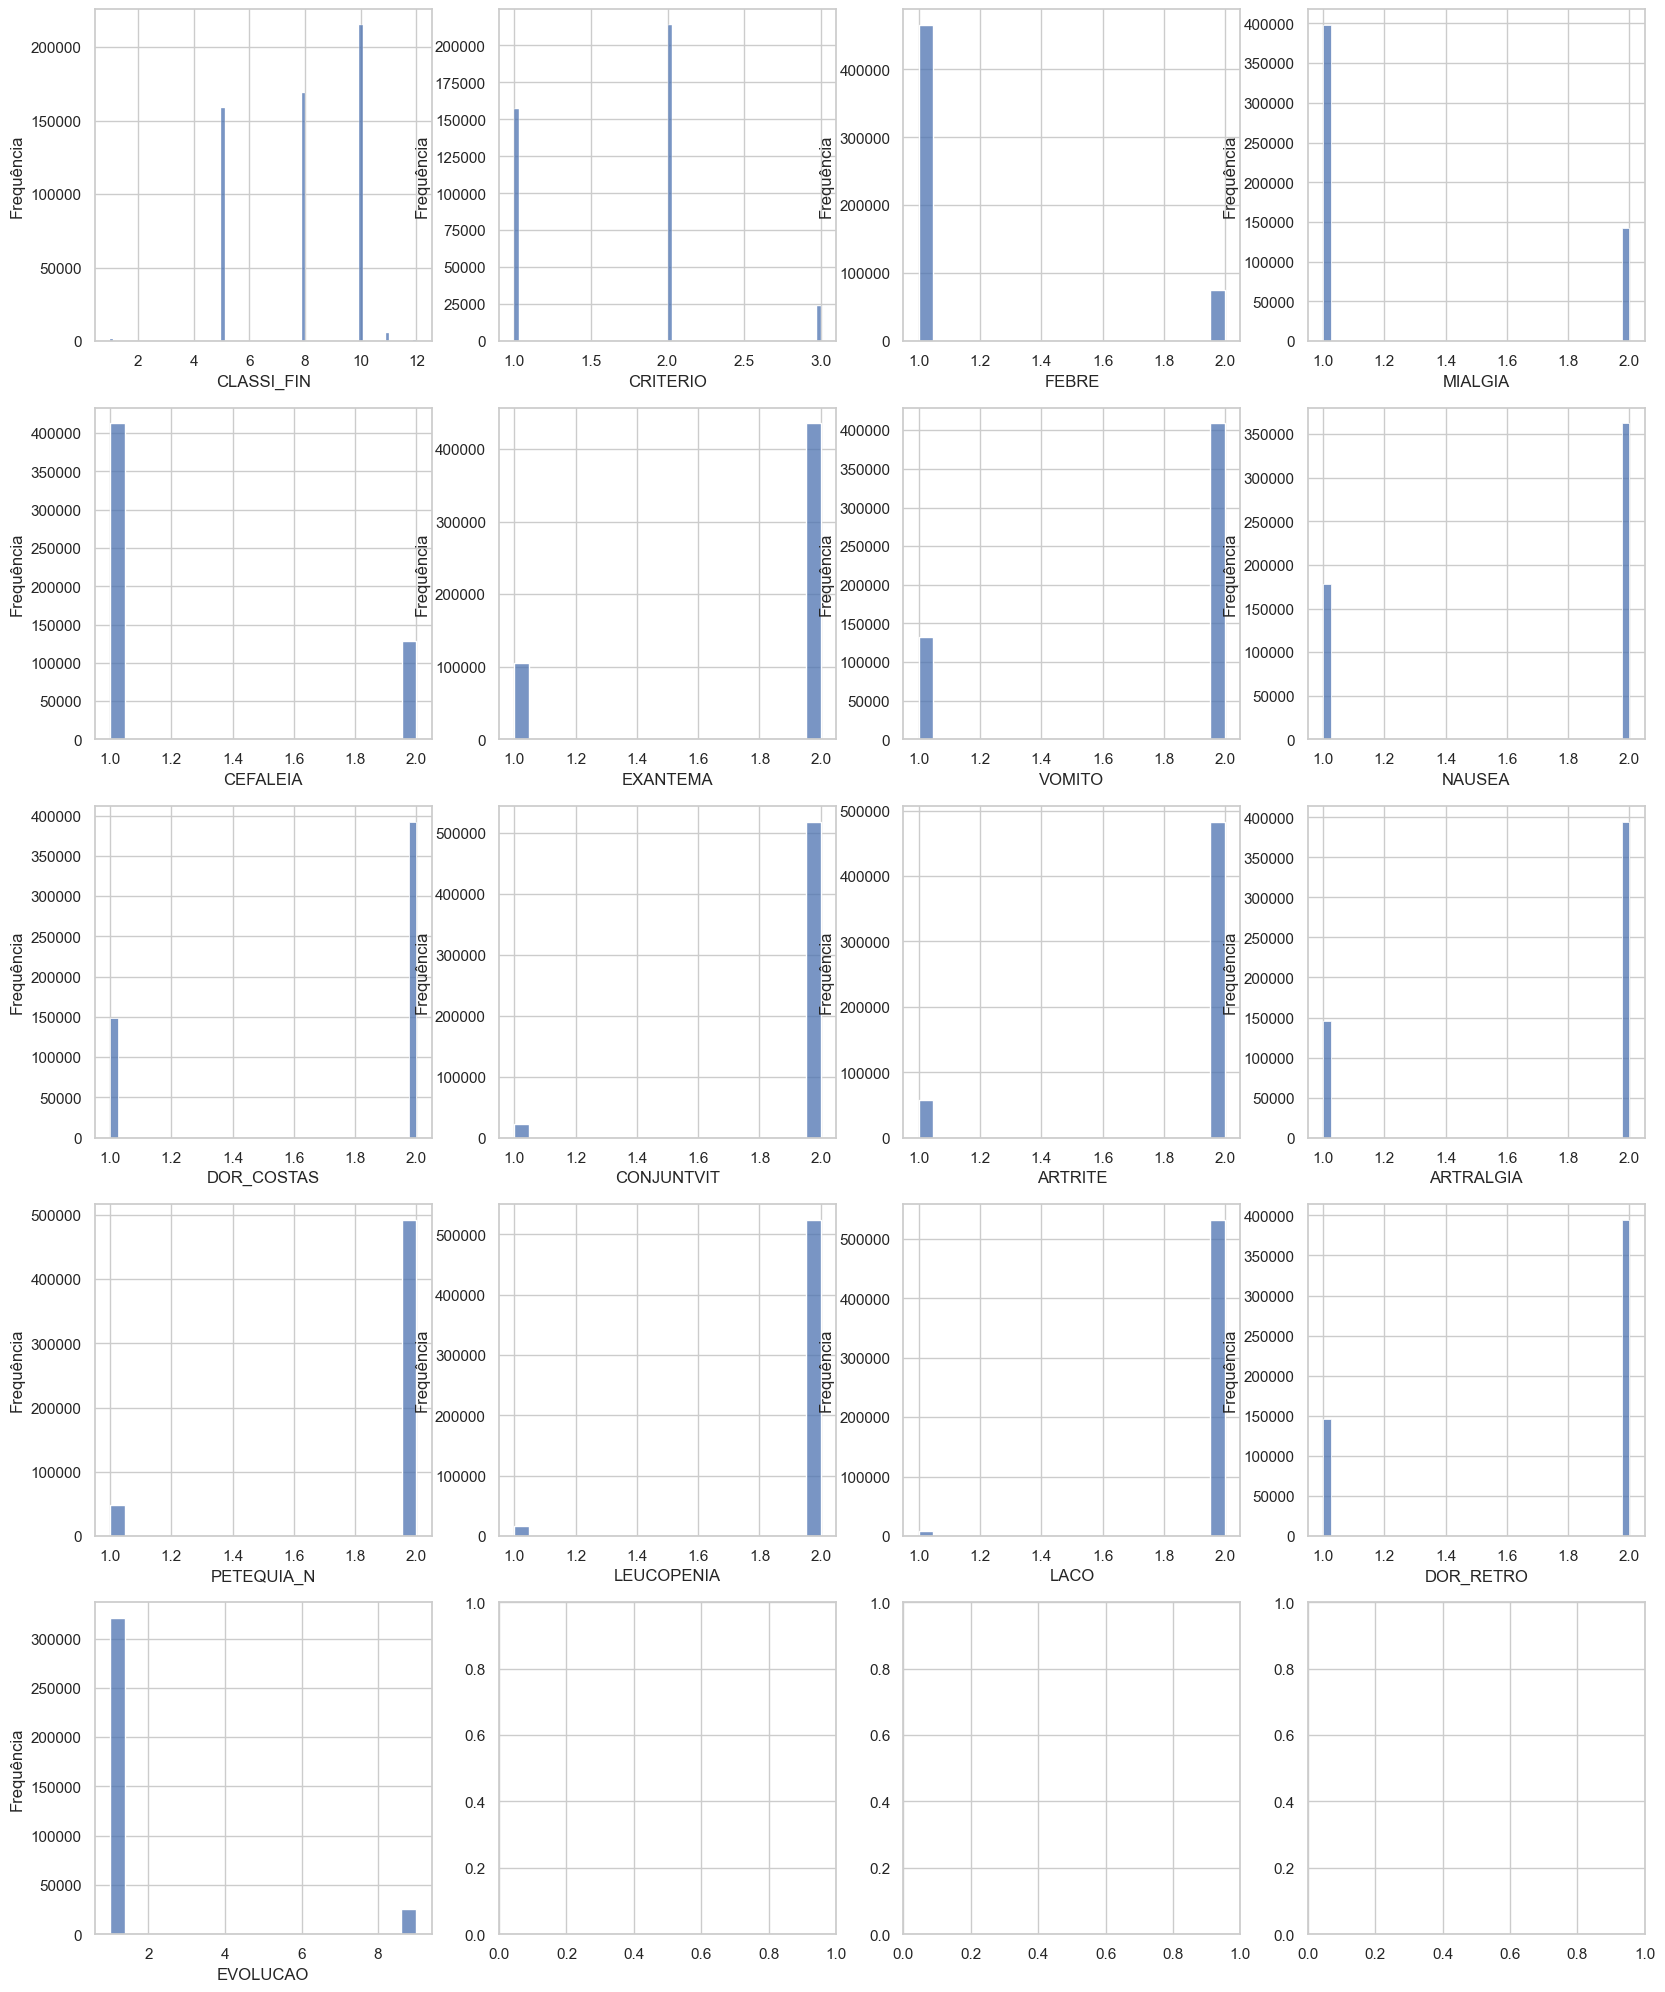

In [8]:
sns.set(style="whitegrid")

num_colunas = 4
num_linhas = math.ceil(len(base_dengue_sc.columns) / num_colunas)

fig, axs = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(20, 5*num_linhas))
for i, coluna in enumerate(base_dengue_sc.columns):
    linha = i // num_colunas
    col = i % num_colunas
    sns.histplot(x=base_dengue_sc[coluna].dropna(), ax=axs[linha, col])
    axs[linha, col].set_xlabel(coluna)
    axs[linha, col].set_ylabel('Frequência')

##### Identificando de Outliers

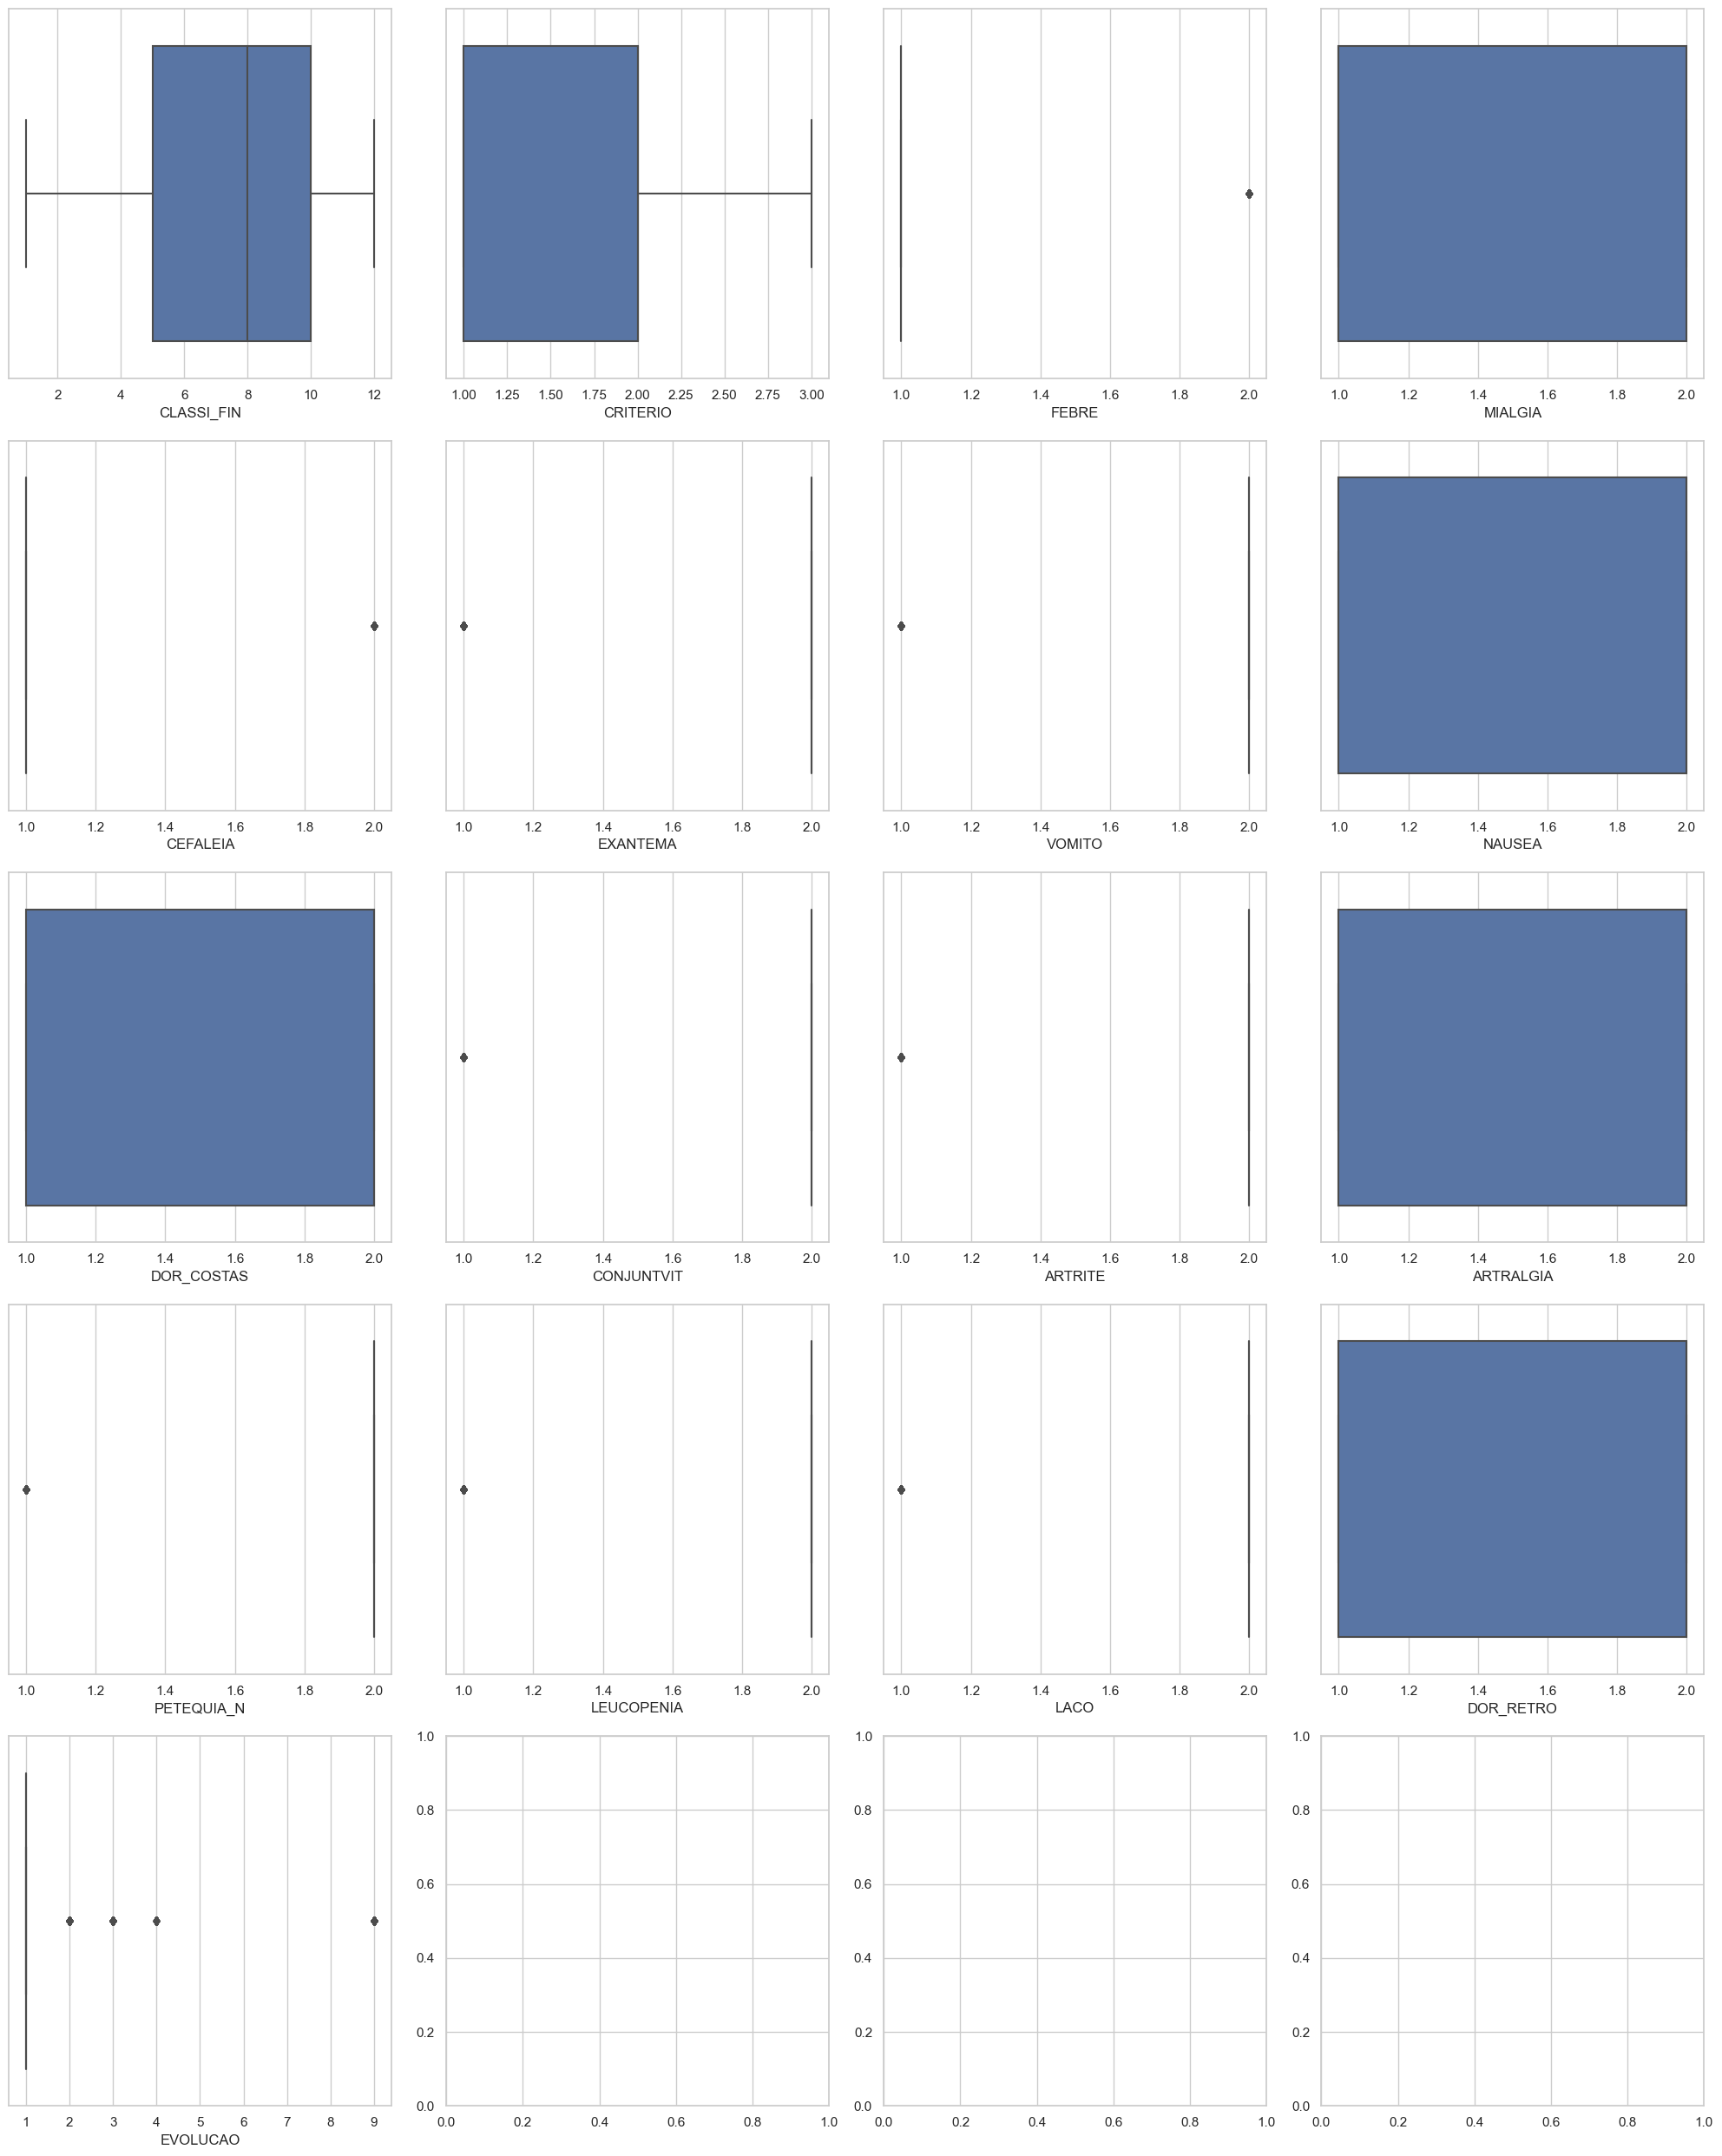

In [9]:
fig, axs = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(20, 5*num_linhas))
for i, coluna in enumerate(base_dengue_sc.columns):
    linha = i // num_colunas
    col = i % num_colunas
    sns.boxplot(x=base_dengue_sc[coluna].dropna(), ax=axs[linha, col])
    axs[linha, col].set_xlabel(coluna)

plt.tight_layout()
plt.show()

##### Analisando o balanceamento das classes das colunas **CLASSI_FIN e CRITERIO**

In [10]:
for coluna in ['CLASSI_FIN', 'CRITERIO']:
    print(f'Contagem de valores para {coluna}:')
    print(base_dengue_sc[coluna].value_counts())
    print()

Contagem de valores para CLASSI_FIN:
CLASSI_FIN
10.0    215033
8.0     169106
5.0     158336
11.0      5656
1.0       1201
12.0       463
2.0          2
Name: count, dtype: int64

Contagem de valores para CRITERIO:
CRITERIO
2.0    213757
1.0    156700
3.0     24049
Name: count, dtype: int64



##### Visualização Gráfica

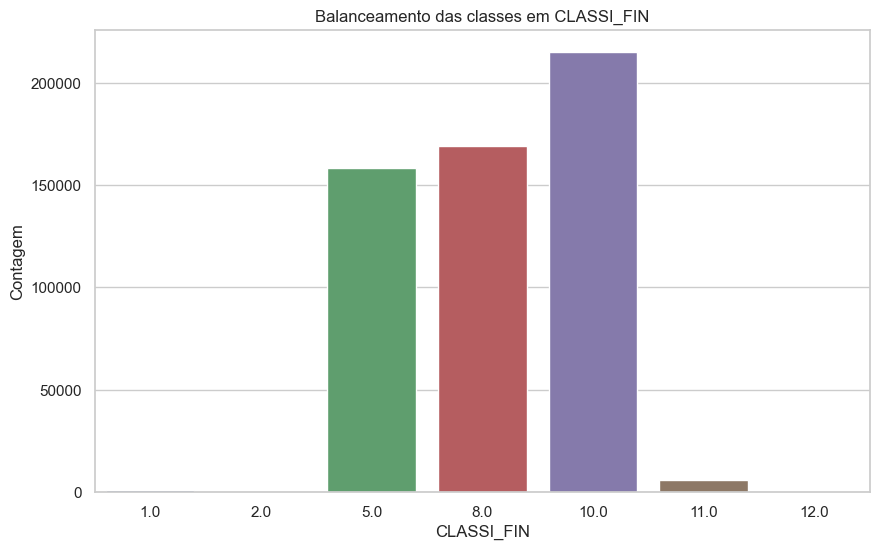

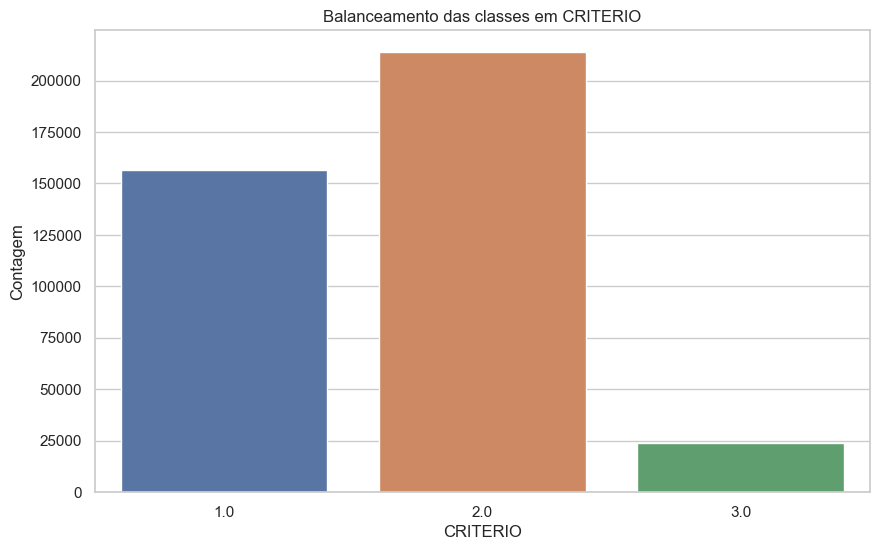

In [11]:
for coluna in ['CLASSI_FIN', 'CRITERIO']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=base_dengue_sc[coluna])
    plt.title(f'Balanceamento das classes em {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.show()

##### Análisando o balanceamento dos dados **CLASSI_FIN e CRITERIO**

In [12]:
for coluna in ['CLASSI_FIN', 'CRITERIO']:
    proporcao = base_dengue_sc[coluna].value_counts(normalize=True) * 100
    print(f'Proporção de valores para {coluna}:')
    print(proporcao)
    print()

Proporção de valores para CLASSI_FIN:
CLASSI_FIN
10.0    39.111345
8.0     30.757898
5.0     28.798993
11.0     1.028743
1.0      0.218444
12.0     0.084213
2.0      0.000364
Name: proportion, dtype: float64

Proporção de valores para CRITERIO:
CRITERIO
2.0    54.183460
1.0    39.720562
3.0     6.095978
Name: proportion, dtype: float64



##### Tratar dados, verificar e remover quaisquer valores ausentes nas features para o modelo

In [13]:
colunas_modelo = [
    'CLASSI_FIN', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO','NAUSEA',
    'DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA','PETEQUIA_N', 'LEUCOPENIA','LACO','DOR_RETRO'
]

df_modelo = base_dengue_sc.filter(items=colunas_modelo)

In [14]:
df_modelo = df_modelo.dropna()

In [15]:
def classificar(numero):
    if numero in [10, 11, 12]:
        return '1'
    else:
        return '0'

df_modelo['CLASSI_FIN'] = df_modelo['CLASSI_FIN'].apply(classificar)

In [16]:
df_modelo

,CLASSI_FIN,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO
2,1,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
5,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,1,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
10,1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615865,0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0
615866,0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
615867,1,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
615869,1,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


In [17]:
df_modelo = df_modelo.astype(int)

In [18]:
correlacao_numerica = df_modelo.select_dtypes('number').corr()
correlacao_numerica

,CLASSI_FIN,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO
CLASSI_FIN,1.000000,-0.023596,-0.030870,-0.028013,-0.017191,-0.033731,-0.048396,0.020768,0.011464,0.029686,0.042868,-0.027631,-0.039915,-0.024796,-0.047893
FEBRE,-0.023596,1.000000,0.196857,0.217500,0.075242,0.069598,0.071100,0.071933,0.031493,0.041181,0.035945,0.028218,0.029749,0.019594,0.083966
MIALGIA,-0.030870,0.196857,1.000000,0.268540,0.052409,-0.001386,0.098005,0.108565,0.039263,0.085084,0.079338,-0.001759,0.019209,0.023153,0.142691
CEFALEIA,-0.028013,0.217500,0.268540,1.000000,0.018844,0.059293,0.161058,0.173044,0.048528,0.078799,0.036201,0.007329,0.005366,0.022540,0.174684
EXANTEMA,-0.017191,0.075242,0.052409,0.018844,1.000000,0.057237,0.090190,0.079283,0.100429,0.108309,0.050115,0.144435,0.062503,0.069887,0.064487
VOMITO,-0.033731,0.069598,-0.001386,0.059293,0.057237,1.000000,0.339104,0.087147,0.055591,0.041965,-0.032012,0.031919,0.048043,0.033083,0.012429
NAUSEA,-0.048396,0.071100,0.098005,0.161058,0.090190,0.339104,1.000000,0.256005,0.105576,0.142021,0.051354,0.075470,0.060920,0.047478,0.148138
DOR_COSTAS,0.020768,0.071933,0.108565,0.173044,0.079283,0.087147,0.256005,1.000000,0.168377,0.284193,0.130539,0.133881,0.044153,0.073779,0.195328
CONJUNTVIT,0.011464,0.031493,0.039263,0.048528,0.100429,0.055591,0.105576,0.168377,1.000000,0.191274,0.073775,0.088009,0.073052,0.082921,0.082777
ARTRITE,0.029686,0.041181,0.085084,0.078799,0.108309,0.041965,0.142021,0.284193,0.191274,1.000000,0.133219,0.139247,0.071210,0.077299,0.124004


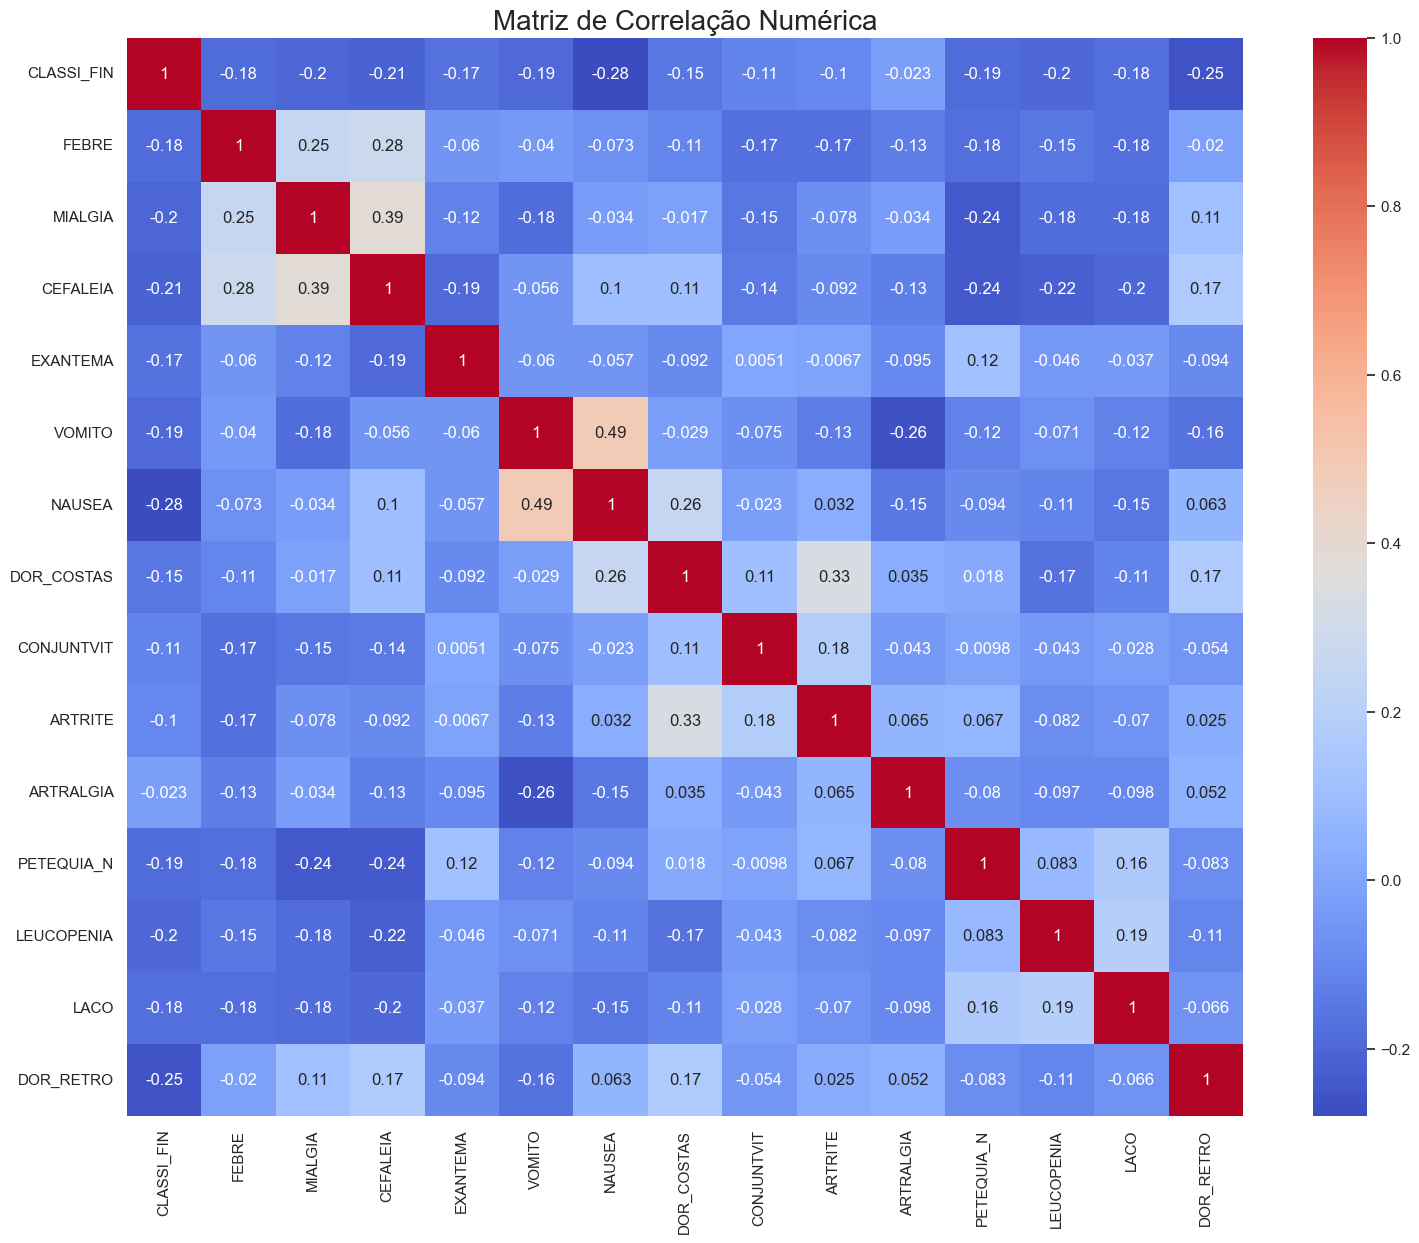

In [19]:
correlation_matrix = correlacao_numerica.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação Numérica", fontsize = 20)
plt.show()

In [20]:
relevant_columns = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO','NAUSEA',
    'DOR_COSTAS','CONJUNTVIT','ARTRITE','ARTRALGIA','PETEQUIA_N', 'LEUCOPENIA','LACO','DOR_RETRO'
]

target_column = 'CLASSI_FIN' 

data_filtered = df_modelo[relevant_columns + [target_column]]
data_filtered = data_filtered.dropna(subset=[target_column])

X = data_filtered.drop(target_column, axis=1)
y = data_filtered[target_column]


##### Codificar variáveis categóricas

In [21]:
categorical_features = [col for col in relevant_columns if data[col].dtype == 'object']
numerical_features = [col for col in relevant_columns if data[col].dtype != 'object']

##### Modelo de regressão logistica

In [22]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', LogisticRegression(solver='lbfgs', penalty='l2', max_iter=100))
])

# Dividir os dados com nova proporção
X_treino, X_temp, y_treino, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_teste, X_val, y_teste, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Treinar o modelo
pipeline.fit(X_treino, y_treino)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_treino, y_treino)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_treino.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.54
Recall: 0.25
F1-score: 0.34
              precision    recall  f1-score   support

           0       0.58      0.82      0.68     26188
           1       0.54      0.25      0.34     21241

    accuracy                           0.57     47429
   macro avg       0.56      0.54      0.51     47429
weighted avg       0.56      0.57      0.53     47429

       Feature       Score
5       NAUSEA  762.209354
13   DOR_RETRO  747.247693
9    ARTRALGIA  579.814725
11  LEUCOPENIA  531.938280
4       VOMITO  366.222325
1      MIALGIA  329.072667
8      ARTRITE  284.854513
2     CEFALEIA  254.730139
10  PETEQUIA_N  236.902166
12        LACO  225.622265
0        FEBRE  170.551083
6   DOR_COSTAS  150.312689
3     EXANTEMA   89.845801
7   CONJUNTVIT   31.203730


##### Modelo K-Nearest Neighbors (KNN)

In [23]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform'))
])

# Dividir os dados
X_treino, X_temp, y_treino, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Treinar o modelo
pipeline.fit(X_treino, y_treino)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_treino, y_treino)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_treino.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.48
Recall: 0.46
F1-score: 0.47
              precision    recall  f1-score   support

           0       0.58      0.59      0.58     26188
           1       0.48      0.46      0.47     21241

    accuracy                           0.53     47429
   macro avg       0.53      0.53      0.53     47429
weighted avg       0.53      0.53      0.53     47429

       Feature       Score
5       NAUSEA  762.209354
13   DOR_RETRO  747.247693
9    ARTRALGIA  579.814725
11  LEUCOPENIA  531.938280
4       VOMITO  366.222325
1      MIALGIA  329.072667
8      ARTRITE  284.854513
2     CEFALEIA  254.730139
10  PETEQUIA_N  236.902166
12        LACO  225.622265
0        FEBRE  170.551083
6   DOR_COSTAS  150.312689
3     EXANTEMA   89.845801
7   CONJUNTVIT   31.203730


##### Modelo Random Forest

In [24]:
# Pipeline de pré-processamento e seleção de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Incorporar a seleção de recursos no pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k='all')),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42))
])

# Dividir os dados
X_treino, X_temp, y_treino, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Treinar o modelo
pipeline.fit(X_treino, y_treino)

# Prever no conjunto de validação
y_val_pred = pipeline.predict(X_val)

# Calcular métricas
precision = precision_score(y_val, y_val_pred, average='binary', pos_label=1)
recall = recall_score(y_val, y_val_pred, average='binary', pos_label=1)
f1 = f1_score(y_val, y_val_pred, average='binary', pos_label=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Relatório completo
print(classification_report(y_val, y_val_pred, target_names=['0', '1']))

# Seleção de features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_treino, y_treino)
scores = selector.scores_

# Exibir a importância das features
feature_scores = pd.DataFrame({'Feature': X_treino.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))

Precision: 0.54
Recall: 0.31
F1-score: 0.40
              precision    recall  f1-score   support

           0       0.58      0.78      0.67     26188
           1       0.54      0.31      0.40     21241

    accuracy                           0.57     47429
   macro avg       0.56      0.55      0.53     47429
weighted avg       0.56      0.57      0.55     47429

       Feature       Score
5       NAUSEA  762.209354
13   DOR_RETRO  747.247693
9    ARTRALGIA  579.814725
11  LEUCOPENIA  531.938280
4       VOMITO  366.222325
1      MIALGIA  329.072667
8      ARTRITE  284.854513
2     CEFALEIA  254.730139
10  PETEQUIA_N  236.902166
12        LACO  225.622265
0        FEBRE  170.551083
6   DOR_COSTAS  150.312689
3     EXANTEMA   89.845801
7   CONJUNTVIT   31.203730
